In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

C:\Users\jdavies\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
%cd "~\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow


In [3]:
green=np.loadtxt(open('s1006_15 532nm neL.txt',"r"),delimiter=",")
green=green-np.nan_to_num(green).min()
green=np.nan_to_num(green)

In [ ]:
fig, ax=plt.subplots(figsize=(12,8))
im=ax.imshow(green, cmap='afmhot', interpolation='none', clim=[0,2e18])

In [ ]:
gx_min=600
gx_max=4280
green_lo=np.mean(green[1740:1780,gx_min:gx_max], axis=0)
gscale=173
gcentre=2328
g_mm=np.linspace(gx_min-gcentre, gx_max-gcentre, gx_max-gx_min)/gscale

In [ ]:
fig, ax=plt.subplots(figsize=(12,8))
im=ax.plot(g_mm,green_lo)

In [4]:
bluer=np.loadtxt(open('s1006_15 355nm neL.txt',"r"),delimiter=",")
bluer=bluer+1.5e17
bluer=np.nan_to_num(bluer)
bluer=np.fliplr(bluer)
blue=bluer*2

In [ ]:
fig, ax=plt.subplots(figsize=(12,8))
im=ax.imshow(blue, cmap='afmhot', interpolation='none', clim=[0,4e18])

In [ ]:
bx_min=418
bx_max=3055
blue_lo=np.mean(blue[1180:1220,bx_min:bx_max], axis=0)
bscale=128
bcentre=1610
b_mm=np.linspace(bx_min-bcentre, bx_max-bcentre, bx_max-bx_min)/bscale

In [5]:
g_0=(1760,2328)
b_0=(1200,1680)
gs=173
bs=128
y_reg=8.5#mm
x_reg=11.5#mm
g_ne=np.transpose(green[g_0[0]-y_reg*gs:g_0[0]+y_reg*gs, g_0[1]-x_reg*gs:g_0[1]+x_reg*gs]/1.6)
b_ne=np.transpose(blue[b_0[0]-y_reg*bs:b_0[0]+y_reg*bs, b_0[1]-x_reg*bs:b_0[1]+x_reg*bs]/1.6)

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


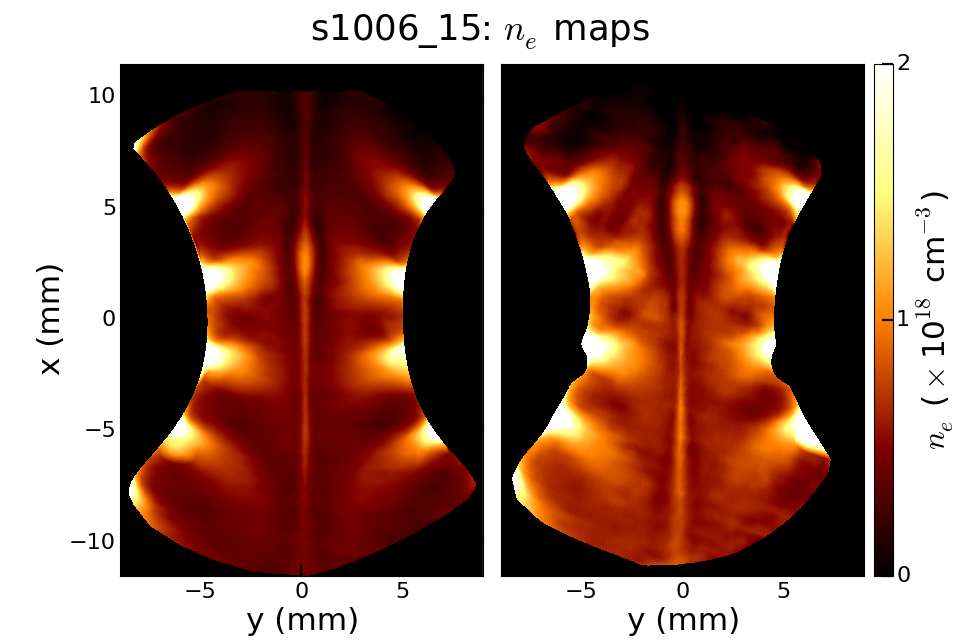

In [6]:
fig, [ax1, ax2]=plt.subplots(1,2,sharey=True, figsize=(12,8))
gim=ax1.imshow(g_ne/1e18, cmap='afmhot', interpolation='none', clim=[0,2], extent=[-9,9,-11.5,11.5], aspect='auto')
bim=ax2.imshow(b_ne/1e18, cmap='afmhot', interpolation='none', clim=[0,2], extent=[-9,9,-11.5,11.5], aspect='auto')
ax1.set_xlabel('y (mm)',fontsize=28)
ax1.set_ylabel('x (mm)',fontsize=28)
ax2.set_xlabel('y (mm)',fontsize=28)
ax2.set_xticks([-5,0,5])
ax1.set_xticks([-5,0,5])

ax1.tick_params(labelsize=20, pad=5, length=10, width=2)
ax2.tick_params(labelsize=20, pad=5, length=10, width=2)

fig.subplots_adjust(wspace=0.05)

cbar_ax = fig.add_axes([0.91, 0.10, 0.02, 0.8])#l,b,w,h

cbar_ax.tick_params(labelsize=20, pad=5, length=10, width=2)
fig.colorbar(bim, cax=cbar_ax, ticks=[0.0,1,2.0])
cbar_ax.set_ylabel(r'$n_e$ ($\times$ 10$^{18}$ cm$^{-3}$)',fontsize=28)
fig.suptitle(r's1006_15: $n_e$ maps', fontsize=32)


In [ ]:
fig.savefig('s1006_15 ne maps.png', dpi=300)

In [ ]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(b_mm,blue_lo)
ax.plot(g_mm,green_lo)

In [ ]:
bpos=4.4
gpos=2.6
V=(bpos-gpos)*1e-3/(20e-9)

In [7]:
%cd "~\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns


In [8]:
green=np.loadtxt(open('s1026_15 532nm neL.txt',"r"),delimiter=",")
green=green-np.nan_to_num(green).min()
green=np.nan_to_num(green)

<IPython.core.display.Javascript object>


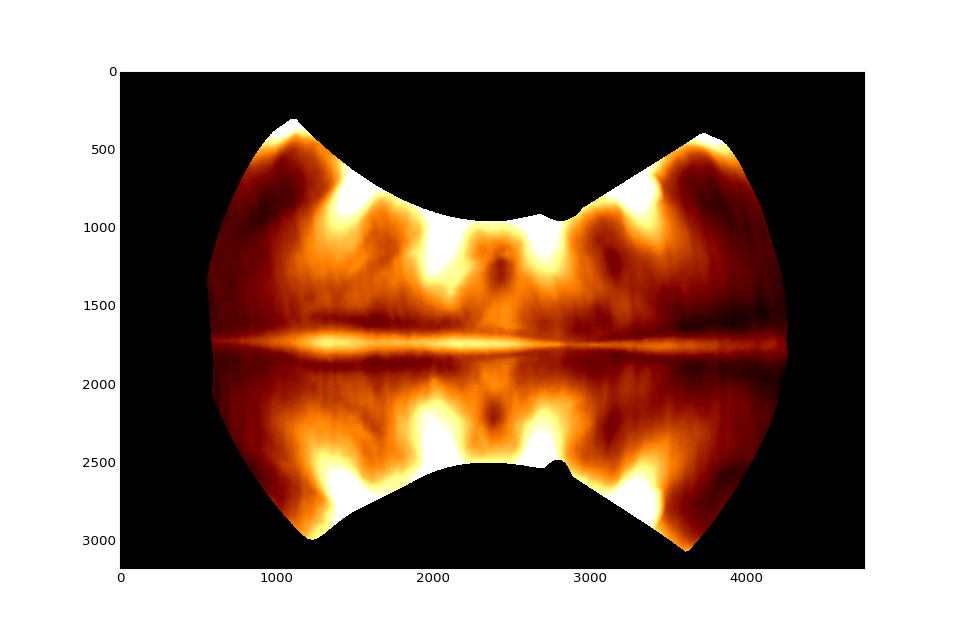

In [12]:
fig, ax=plt.subplots(figsize=(12,8))
im=ax.imshow(green, cmap='afmhot', interpolation='none', clim=[0,2e18])